In [477]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/test.csv
/kaggle/input/train.csv
/kaggle/input/gender_submission.csv


In [478]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [479]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**EXPLORATORY DATA ANALYSIS - Initial Investigation to understand the Data**

In [480]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [481]:
train.shape

(891, 12)

In [482]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [483]:
print(train.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [484]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [485]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


DATA UNDERSTANDING

In [486]:
import seaborn as sns
import matplotlib.pyplot as plt

In [487]:
numeric_variables = ["PassengerId", "Pclass", "Survived", "Age", "SibSp", "Parch", "Fare"]
categorical_variables = ["Name" , "Sex", "Ticket", "Embarked"]

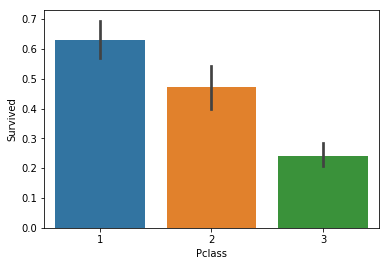

In [488]:
sns.barplot(x = "Pclass" , y = "Survived" , data = train)
#Passenger class 1 people has survived more

([<matplotlib.patches.Wedge at 0x7fd7eb9be390>,
 [Text(0.11972366353305902, 1.1940126650878637, 'Pclass1'),
  Text(-0.679727556185792, -0.8648528483861814, 'Pclass2'),
  Text(0.9283538844566568, -0.5900500531431521, 'Pclass3')],
 [Text(0.06983880372761775, 0.6965073879679204, '46.8%'),
  Text(-0.3707604851922501, -0.4717379173015534, '35.2%'),
  Text(0.5063748460672673, -0.3218454835326284, '18.0%')])

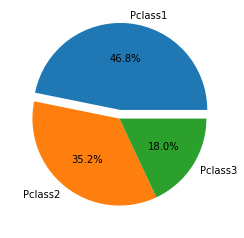

In [489]:
Pclass1=train["Survived"][train["Pclass"] == 1].value_counts(normalize=True)[1]*100
Pclass2=train["Survived"][train["Pclass"] == 2].value_counts(normalize=True)[1]*100
Pclass3=train["Survived"][train["Pclass"] == 3].value_counts(normalize=True)[1]*100
Pclass_Values=[Pclass1,Pclass2,Pclass3]
plt.pie(Pclass_Values, labels=('Pclass1','Pclass2','Pclass3') ,explode=(0.1,0.0,0.0), autopct='%1.1f%%')

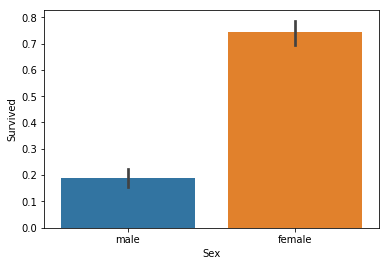

In [490]:
sns.barplot(x = "Sex" , y = "Survived" , data = train)
#females has survived more

([<matplotlib.patches.Wedge at 0x7fd7eb8d1748>,
 [Text(0.8839489990423482, 0.6547015862910605, 'males'),
  Text(-0.9643080323903352, -0.7142198671750042, 'Females')],
 [Text(0.4821539994776444, 0.3571099561587602, '20.3%'),
  Text(-0.5625130188943621, -0.41662825585208574, '79.7%')])

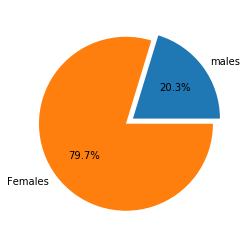

In [491]:
Females=train["Survived"][train["Sex"] == 'female'].value_counts(normalize=True)[1]*100
males=train["Survived"][train["Sex"] == 'male'].value_counts(normalize=True)[1]*100
Sex_values=[males,Females]
plt.pie(Sex_values, labels=('males','Females'),explode=(0.0,0.1),autopct='%1.1f%%')

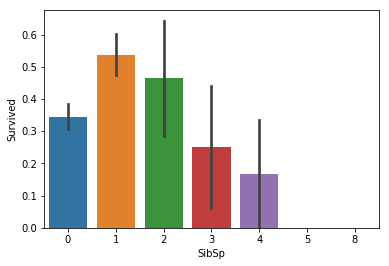

In [492]:
sns.barplot(x = "SibSp" , y = "Survived" , data = train)
#people with 1 siblings survived more

([<matplotlib.patches.Wedge at 0x7fd7eb8064e0>,
 [Text(0.9796105512599065, 0.6930823672986224, 'SibSp0'),
  Text(-0.6933682678850916, 0.979408211671736, 'SibSp1'),
  Text(-0.8113710944646718, -0.8841249612284457, 'SibSp2'),
  Text(0.6075378709838312, -1.0348418890441349, 'SibSp3'),
  Text(1.147419347144639, -0.3513244110479238, 'SibSp4')],
 [Text(0.5714394882349454, 0.404298047590863, '19.6%'),
  Text(-0.4044648229329701, 0.5713214568085125, '30.4%'),
  Text(-0.4732998051043919, -0.5157395607165933, '26.3%'),
  Text(0.35439709140723485, -0.6036577686090787, '14.2%'),
  Text(0.6693279525010394, -0.2049392397779555, '9.5%')])

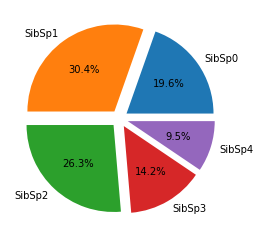

In [493]:
a = train["Survived"][train['SibSp'] == 0].value_counts(normalize=True)[1]*100
b = train["Survived"][train['SibSp'] == 1].value_counts(normalize=True)[1]*100
c = train["Survived"][train['SibSp'] == 2].value_counts(normalize=True)[1]*100
d = train["Survived"][train['SibSp'] == 3].value_counts(normalize=True)[1]*100
e = train["Survived"][train['SibSp'] == 4].value_counts(normalize=True)[1]*100
Sibling_values=[a,b,c,d,e]
plt.pie(Sibling_values, labels=('SibSp0','SibSp1','SibSp2','SibSp3','SibSp4'),explode=(0.1,0.1,0.1,0.1,0.1), autopct='%1.1f%%')

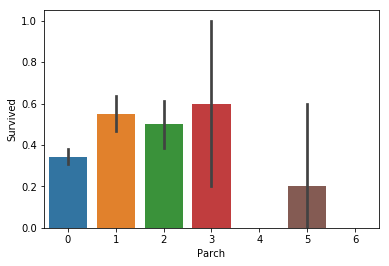

In [494]:
sns.barplot(x = "Parch" , y = "Survived" , data = train)
#people with parch = 3 survived more

([<matplotlib.patches.Wedge at 0x7fd7eb7bfda0>,
 [Text(0.9695439355684821, 0.5196003820267835, 'Parch0'),
  Text(-0.2203939284396176, 1.0776950015226725, 'Parch1'),
  Text(-1.089948323161936, -0.1483666163140617, 'Parch2'),
  Text(0.16652973036658655, -1.1883887616870297, 'Parch3'),
  Text(1.0552203709960284, -0.31066053601158317, 'Parch5')],
 [Text(0.5288421466737174, 0.28341839019642734, '15.7%'),
  Text(-0.12021487005797322, 0.5878336371941849, '25.1%'),
  Text(-0.5945172671792378, -0.08092724526221547, '22.8%'),
  Text(0.09714234271384216, -0.6932267776507673, '27.3%'),
  Text(0.5755747478160155, -0.1694512014608635, '9.1%')])

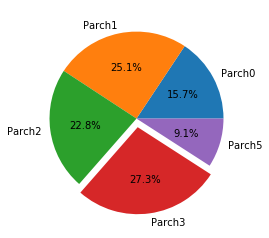

In [495]:
P0=train["Survived"][train["Parch"] == 0].value_counts(normalize=True)[1]*100
P1=train["Survived"][train["Parch"] == 1].value_counts(normalize=True)[1]*100
P2=train["Survived"][train["Parch"] == 2].value_counts(normalize=True)[1]*100
P3=train["Survived"][train["Parch"] == 3].value_counts(normalize=True)[1]*100
P5=train["Survived"][train["Parch"] == 5].value_counts(normalize=True)[1]*100
Parch_values=[P0,P1,P2,P3,P5]
plt.pie(Parch_values, labels=('Parch0','Parch1','Parch2','Parch3','Parch5'),explode=(0.0,0.0,0.0,0.1,0.0),autopct='%1.1f%%')

MISSING VALUE ANALYSIS

In [496]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [497]:
missing_value_percentage = print(train.isnull().sum()/len(train))
missing_value_percentage

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


drop cabin as it has a huge number of missing values and few other variables which are not important for the model

In [498]:
train = train.drop(["Cabin", "Name", "Fare", "Ticket"], axis = 1)

In [499]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [500]:
print(train.isnull().sum())

#lets impute other missing values 

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64


In [501]:
#impute age with mean as it is numeric 
#impute embarked with mode as it is categorical
train['Age'] = train['Age'].fillna(train['Age'].mean())
train["Embarked"] = pd.Categorical(train["Embarked"])
train["Embarked"] = train["Embarked"].cat.codes
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode())
print(train.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64


In [502]:
train["Embarked"] = train["Embarked"].astype("object")
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
dtype: object


In [503]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,2
1,2,1,1,female,38.0,1,0,0
2,3,1,3,female,26.0,0,0,2
3,4,1,1,female,35.0,1,0,2
4,5,0,3,male,35.0,0,0,2


In [504]:
train["Sex"] = pd.Categorical(train["Sex"])
train["Sex"] = train["Sex"].cat.codes
train["Sex"] = train["Sex"].astype("object")

#male = 1, female = 0

In [505]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2


In [506]:
train.shape

(891, 8)

In [507]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


Outlier analysis

In [508]:
numeric_variables2 = ["Pclass", "Survived", "Age",]
categorical_variables2 = [ "Sex", "Embarked"]

Pclass


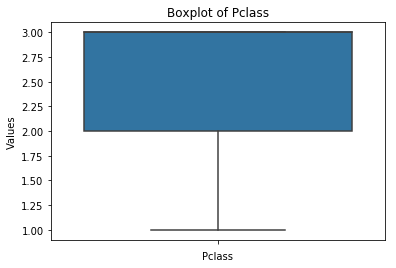

Survived


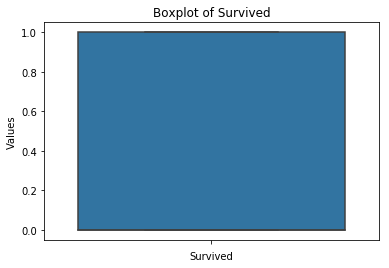

Age


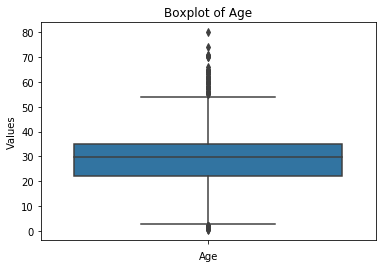

In [509]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in numeric_variables2 :
    print(i)
    sns.boxplot(y = train[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

**there is lot of outliers in the data so lets replace those outliers with NA and impute it **

In [510]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_variables2:
    print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# replace outliers with NA

    train.loc[train[i]<Innerfence, i] = np.nan
    train.loc[train[i]>Upperfence, i] = np.nan

Pclass
Innerfence= 0.5
Upperfence= 4.5
IQR =1.0
Survived
Innerfence= -1.5
Upperfence= 2.5
IQR =1.0
Age
Innerfence= 2.5
Upperfence= 54.5
IQR =13.0


In [511]:
print(train.isnull().sum()/len(train))

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.074074
SibSp          0.000000
Parch          0.000000
Embarked       0.000000
dtype: float64


In [512]:
#impute age with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())
print(train.isnull().sum())        

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64


In [513]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0.0,3.0,1,22.0,1,0,2
1,2,1.0,1.0,0,38.0,1,0,0
2,3,1.0,3.0,0,26.0,0,0,2
3,4,1.0,1.0,0,35.0,1,0,2
4,5,0.0,3.0,1,35.0,0,0,2


In [514]:
train.dtypes

PassengerId      int64
Survived       float64
Pclass         float64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
dtype: object

**FEATURE SELECTION**

In [515]:
numeric_variables3 = ["PassengerId", "Survived", "Pclass", "Age", "SibsSp", "Parch"]

**CORRELATION ANALYSIS**

In [516]:
Correlation = train.loc[:, numeric_variables3]
correlation_result = Correlation.corr()
print(correlation_result)
    

             PassengerId  Survived    Pclass       Age  SibsSp     Parch
PassengerId     1.000000 -0.005007 -0.035144  0.046565     NaN -0.001652
Survived       -0.005007  1.000000 -0.338481 -0.026247     NaN  0.081629
Pclass         -0.035144 -0.338481  1.000000 -0.271371     NaN  0.018443
Age             0.046565 -0.026247 -0.271371  1.000000     NaN -0.124932
SibsSp               NaN       NaN       NaN       NaN     NaN       NaN
Parch          -0.001652  0.081629  0.018443 -0.124932     NaN  1.000000


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


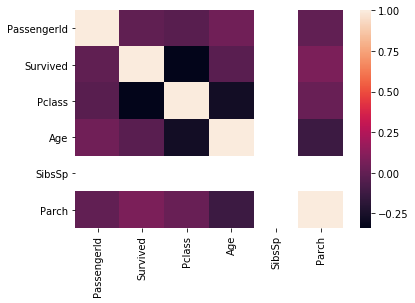

In [517]:
heatmap =  sns.heatmap(correlation_result)

#No collinearity is found

In [518]:
#Data Distribution

x = train.drop(["Survived"], axis = 1)
y = train["Survived"]

In [519]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

#divide the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

MODELLING

RANDOM FOREST

In [520]:
from sklearn.ensemble import RandomForestClassifier

RM_model = RandomForestClassifier()
RM_model.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [521]:
RM_model.score(x_test, y_test)

0.8379888268156425

In [522]:
y_predrm = RM_model.predict(x_test)

#Accuracy

accuracy_rm = round(accuracy_score(y_predrm, y_test)*100,2)
print(accuracy_rm)

83.8


In [523]:
from sklearn.metrics import classification_report  
print(classification_report(y_predrm, y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       117
         1.0       0.74      0.82      0.78        62

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [524]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_predrm, y_test))

[[99 18]
 [11 51]]


LOGISTIC REGRESSION

In [525]:
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression()
LR_Model.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [526]:
LR_Model.score(x_test,y_test)

0.7932960893854749

In [527]:
y_predlr = LR_Model.predict(x_test)

#Accuracy
accuracy_lr = round(accuracy_score(y_predlr, y_test) * 100, 2)
print("Accuracy:",accuracy_lr)

Accuracy: 79.33


In [528]:
print(classification_report(y_predlr, y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84       115
         1.0       0.70      0.75      0.72        64

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.80      0.79      0.79       179



In [529]:
print(confusion_matrix(y_predlr, y_test))

[[94 21]
 [16 48]]


It is found that in normal cases Random Forest is a better model for the given dataset, hypertuning can be done to improve the accuracy far more better

Predict in Test data

In [530]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [531]:
#Drop unnecessary columns 
test = test.drop(['Name','Ticket','Fare','Cabin'], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [532]:
#Convert datatype
test["Sex"] = pd.Categorical(test["Sex"])
test["Sex"] = test["Sex"].cat.codes
test["Sex"] = test["Sex"].astype("object")

test["Embarked"] = pd.Categorical(test["Embarked"])
test["Embarked"] = test["Embarked"].cat.codes
test["Embarked"] = test["Embarked"].astype("object")

test.head()



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,2
4,896,3,0,22.0,1,1,2


In [533]:
#Check for NA values
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [534]:
test["Age"] = test["Age"].fillna(test["Age"].mean())

In [535]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [536]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,2
4,896,3,0,22.0,1,1,2


In [537]:
test["Survived"] = RM_model.predict(test)

In [538]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,1,34.5,0,0,1,0.0
1,893,3,0,47.0,1,0,2,0.0
2,894,2,1,62.0,0,0,1,0.0
3,895,3,1,27.0,0,0,2,0.0
4,896,3,0,22.0,1,1,2,0.0


In [545]:
predicted_test = test.drop(['Pclass','Sex','Age','SibSp', "Parch", "Embarked"], axis=1)


In [551]:
y_output = predicted_test["Survived"]


In [540]:
given_output = pd.read_csv("../input/gender_submission.csv")

In [553]:
y_given= given_output["Survived"]

In [555]:
accuracy_final = round(accuracy_score(y_output, y_given) * 100, 2)
print("Accuracy:",accuracy_final)

Accuracy: 71.53


In [556]:
print(confusion_matrix(y_output, y_given))

[[234  87]
 [ 32  65]]


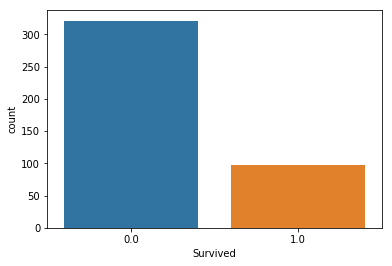

In [560]:
sns.countplot(x="Survived",data=test , )

In [563]:
test['Survived'].value_counts()

0.0    321
1.0     97
Name: Survived, dtype: int64

got 71.53 % accuracy with resembelence to the actual output, the model can be hypertuned , variable engineered etc can be done to improve the accuracy of the model 

In [570]:
test.to_csv('submission.csv', index=False)